In [1]:
!pip install --quiet google-play-scraper


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# Core library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Web scraping
from google_play_scraper import (
    Sort,
    reviews
)

pd.set_option('display.max_colwidth', None)
sns.set_style("whitegrid")

print('Ready!')

Ready!


In [3]:
gp_result, gp_continuation_token = reviews(
    'com.tokopedia.tkpd',
    lang='id',             # Indonesian Language
    country='id',          # Region
    sort=Sort.NEWEST,      # Sort by the newest
    count=100_00,           # The amount of review to scrap
    filter_score_with=None
)

In [5]:
df_scrape = pd.DataFrame(gp_result)

# Choose only the necessary column only
df_final = df_scrape[['content', 'score', 'at']]
df_final.columns = ['review_text', 'rating', 'date']
df_final.head()

,review_text,rating,date
0,"tokopedia sekarang jadi ribet tidak seperti dulu lagi kalo mau return barang yang tidak sesuai harus nunggu waktu terlalu lama jadi males belanja lagi di tokopedia saya auto unistal, tidak seperti shopee yang mudah dan enak dan sekarang belaja terus di shopee",1,2025-11-26 16:30:31
1,"kasih bintang 1 ,karena ngisi kouta saja lama prosesnya",1,2025-11-26 15:05:33
2,"di janjikan dapet kompensasi atas keterlambatan pengiriman sameday yg gak sesuai estimasi, sampai sekarang udh 8 hari kerja blm dapet jga gimana sih Tokopedia",1,2025-11-26 15:03:32
3,gopay coins hilang tanpa ada invoice katny berhasil tapi tidak ada bukti..kecewa sangat,1,2025-11-26 14:43:20
4,"Belanja di Tokopedia Jauh lebih mahal ketimbang di Shopee, mungkin karena Tokopedia berusaha dilenyapkan oleh Merger perusahaan sampah",1,2025-11-26 14:27:12


In [6]:
df_final.to_csv('test_size.csv')

In [10]:
df_final.iloc[:16400,].date

0     2025-11-26 16:30:31
1     2025-11-26 15:05:33
2     2025-11-26 15:03:32
3     2025-11-26 14:43:20
4     2025-11-26 14:27:12
              ...        
995   2025-11-13 07:58:18
996   2025-11-13 07:45:22
997   2025-11-13 07:39:07
998   2025-11-13 07:36:41
999   2025-11-13 07:12:31
Name: date, Length: 1000, dtype: datetime64[ns]

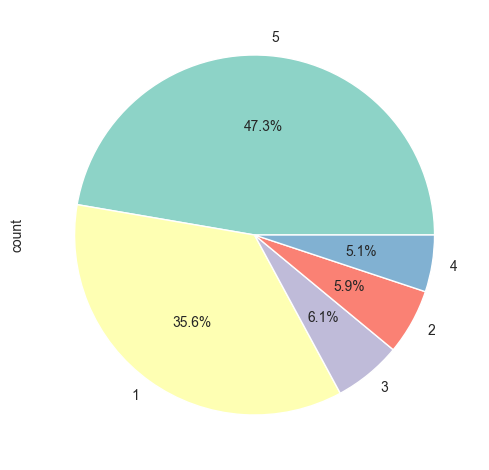

In [11]:
df_final.rating.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.tight_layout()
plt.show()